In [281]:
#move from google colab (original wwork due to tensor flow not working)

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
#pip install xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
 

In [282]:
# Import our input dataset (red whine)
Red_df = pd.read_csv('wine_quality_Red_remove_outliers.csv')
Red_df.head()

,Unnamed: 0,Wine_Type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,Red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,Red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,Red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [283]:
# Clean file for ML activities (red whine)
Red_df = Red_df.drop('Wine_Type', axis=1)
Red_df.drop(Red_df.columns[Red_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
Red_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1431,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1432,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1433,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [284]:
# Import our input dataset (White whine)
White_df = pd.read_csv('wine_quality_White_remove_outliers.csv')
White_df.head()

,Unnamed: 0,Wine_Type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [285]:
# Clean file for ML activities (White wine)
White_df = White_df.drop('Wine_Type', axis=1)
White_df.drop(White_df.columns[White_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
White_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4685,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4686,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4687,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4688,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


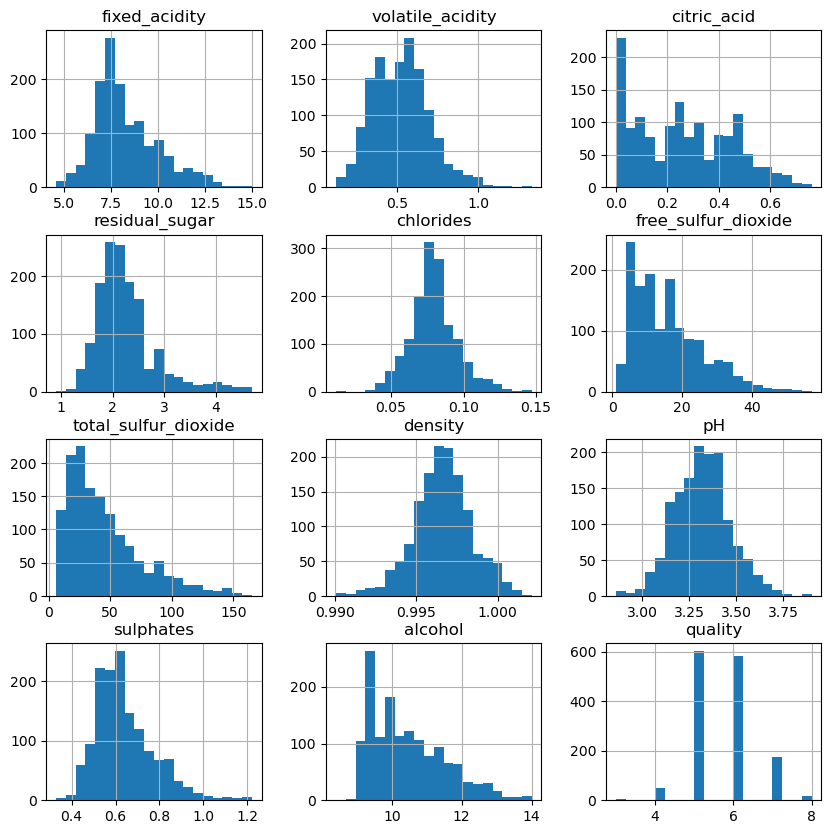

In [286]:
# Start with Red Wine

#distributions 

Red_df.hist(bins=20, figsize=(10, 10))
plt.show()

In [333]:
Red_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1435.0,8.294704,1.704257,4.60000,7.10000,7.9000,9.20000,15.0000
volatile_acidity,1435.0,0.525031,0.176757,0.12000,0.39000,0.5200,0.63000,1.3300
citric_acid,1435.0,0.261003,0.189783,0.00000,0.09000,0.2500,0.42000,0.7600
residual_sugar,1435.0,2.270662,0.593623,0.90000,1.90000,2.2000,2.50000,4.7000
chlorides,1435.0,0.079296,0.016440,0.01200,0.07000,0.0780,0.08800,0.1470
free_sulfur_dioxide,1435.0,15.668641,9.830668,1.00000,8.00000,14.0000,21.00000,57.0000
total_sulfur_dioxide,1435.0,44.933101,30.465256,6.00000,22.00000,37.0000,60.00000,165.0000
density,1435.0,0.996620,0.001801,0.99007,0.99552,0.9966,0.99774,1.0021
pH,1435.0,3.318997,0.148639,2.86000,3.22000,3.3200,3.41000,3.9000
sulphates,1435.0,0.641693,0.133479,0.33000,0.55000,0.6200,0.71000,1.2200


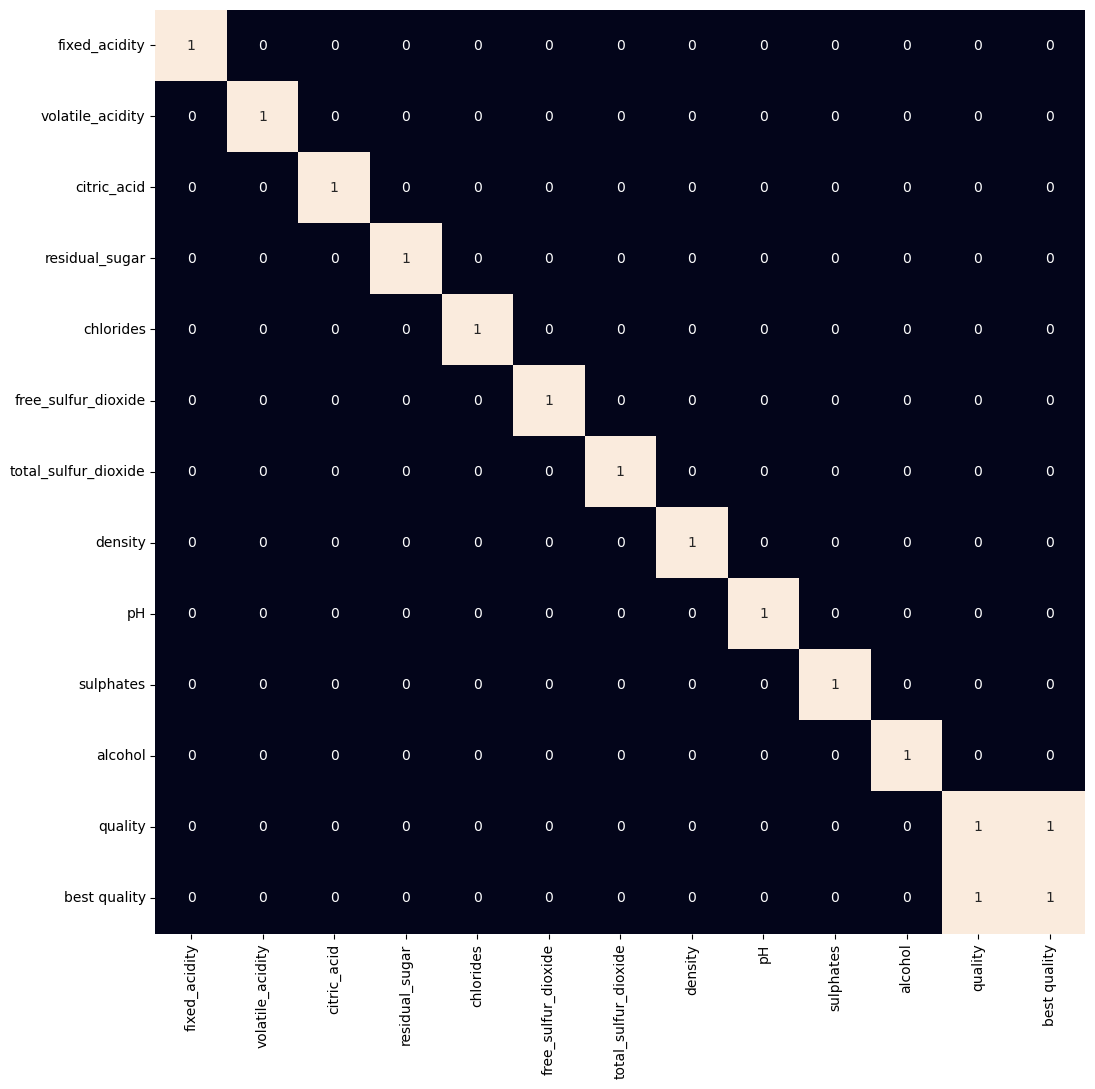

In [334]:
# Look for redundant features (corr>0.7)

plt.figure(figsize=(12, 12))
sb.heatmap(Red_df.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [335]:
# Drop columns (if necessary); redundant features

#Red_df = Red_df.drop('xxxxx', axis=1)

In [336]:
#  ***add best quality column, target best quality vs quality
# Quality data is unbalanced 
#create "best quality" >5 (3-5,6-9)....also try with >6 (3-6,7-9)

Red_df['best quality'] = [1 if x>5 else 0 for x in Red_df.quality]

In [344]:
#Split data into training and test/validation (80/20); tried 75/25

#From Klaus- stratify the ywhites column so we don't end up with all '8-9' in the testing data, for example


y = Red_df['best quality'] #target
X = Red_df.drop(['quality', 'best quality'], axis=1) #features

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=40)
X_train.shape, X_test.shape


((1148, 11), (287, 11))

In [345]:
# Normalize the data before training

norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

#convert X_test to df for easy viewing, confirmed data from all columns scaled form 0 to 1
X_test_df = pd.DataFrame(np.squeeze(X_train))
X_test_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.757282,0.363636,0.644737,0.394737,0.390977,0.071429,0.132075,0.817124,0.222222,0.606742,0.446429
1,0.252427,0.438017,0.000000,0.078947,0.398496,0.250000,0.094340,0.376559,0.535354,0.157303,0.285714
2,0.184466,0.574380,0.026316,0.473684,0.451128,0.285714,0.176101,0.451372,0.727273,0.629213,0.696429
3,0.310680,0.632231,0.039474,0.236842,0.345865,0.053571,0.012579,0.592685,0.505051,0.000000,0.125000
4,0.281553,0.314050,0.381579,0.368421,0.556391,0.071429,0.050314,0.411471,0.464646,0.325843,0.553571
...,...,...,...,...,...,...,...,...,...,...,...
1143,0.165049,0.214876,0.184211,0.342105,0.195489,0.250000,0.119497,0.421446,0.585859,0.359551,0.482143
1144,0.359223,0.363636,0.105263,0.315789,0.699248,0.267857,0.238994,0.476309,0.272727,0.213483,0.464286
1145,0.194175,0.413223,0.276316,0.263158,0.503759,0.125000,0.352201,0.576060,0.666667,0.280899,0.160714
1146,0.475728,0.247934,0.460526,0.315789,0.533835,0.285714,0.201258,0.511222,0.373737,0.370787,0.482143


In [346]:
#look at (3) different models

models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
 
for i in range(3):
    models[i].fit(X_train, y_train)
 
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(y_train, models[i].predict(X_train)))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        y_test, models[i].predict(X_test)))
    print()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) : 
Training Accuracy :  0.7483843467260677
Validation Accuracy :  0.7912756598240469

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              

In [347]:
# From above LogisticalRegression and SVC classifiers both have less difference between training and validation data

In [348]:
# LogisticalRegression

print(metrics.classification_report(y_test,
                                    models[0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       132
           1       0.82      0.79      0.80       155

    accuracy                           0.79       287
   macro avg       0.79      0.79      0.79       287
weighted avg       0.79      0.79      0.79       287



In [349]:
# XGBClassifier (Extreme Gradient Boosting)

print(metrics.classification_report(y_test,
                                    models[1].predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       132
           1       0.83      0.80      0.81       155

    accuracy                           0.80       287
   macro avg       0.80      0.80      0.80       287
weighted avg       0.80      0.80      0.80       287



In [350]:
#SVC (Support Vector Classification)

print(metrics.classification_report(y_test,
                                    models[2].predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       132
           1       0.82      0.75      0.79       155

    accuracy                           0.78       287
   macro avg       0.78      0.78      0.78       287
weighted avg       0.78      0.78      0.78       287



In [351]:
# Go back and change best Quality definition >6 and >7; >5 best result
# note >5 ( grouping of 3-5 and 6-9) best results using SVc ~80% accuracy


# repeat exercise for white wines 

# repeat exercise for red wines

In [352]:
#White wine

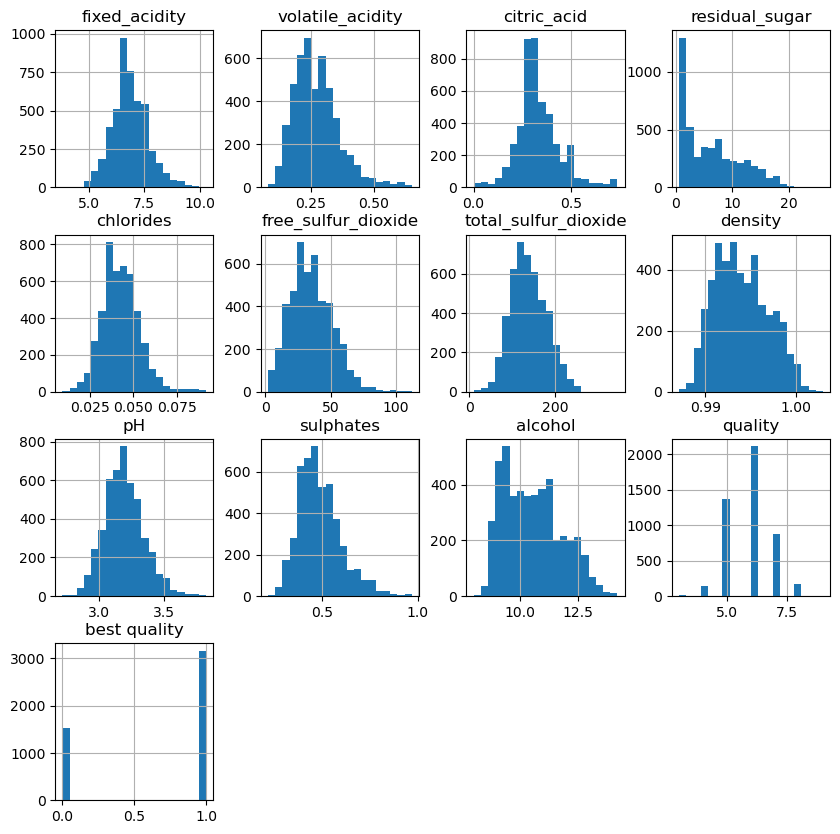

In [353]:
#distributions 

White_df.hist(bins=20, figsize=(10, 10))
plt.show()

In [354]:
White_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,4690.0,6.849947,0.829404,3.80000,6.3000,6.8000,7.3000,10.30000
volatile_acidity,4690.0,0.272998,0.090619,0.08000,0.2100,0.2600,0.3200,0.65000
citric_acid,4690.0,0.330699,0.110801,0.00000,0.2700,0.3200,0.3800,0.74000
residual_sugar,4690.0,6.397996,4.990708,0.60000,1.7000,5.2000,9.9000,26.05000
chlorides,4690.0,0.042874,0.010929,0.00900,0.0350,0.0420,0.0500,0.09200
free_sulfur_dioxide,4690.0,35.091471,16.160921,2.00000,23.0000,34.0000,46.0000,112.00000
total_sulfur_dioxide,4690.0,137.843710,41.711983,10.00000,108.0000,134.0000,167.0000,344.00000
density,4690.0,0.993987,0.002917,0.98711,0.9917,0.9937,0.9961,1.00295
pH,4690.0,3.190829,0.150703,2.72000,3.0900,3.1800,3.2800,3.82000
sulphates,4690.0,0.488913,0.111890,0.22000,0.4100,0.4700,0.5500,0.97000


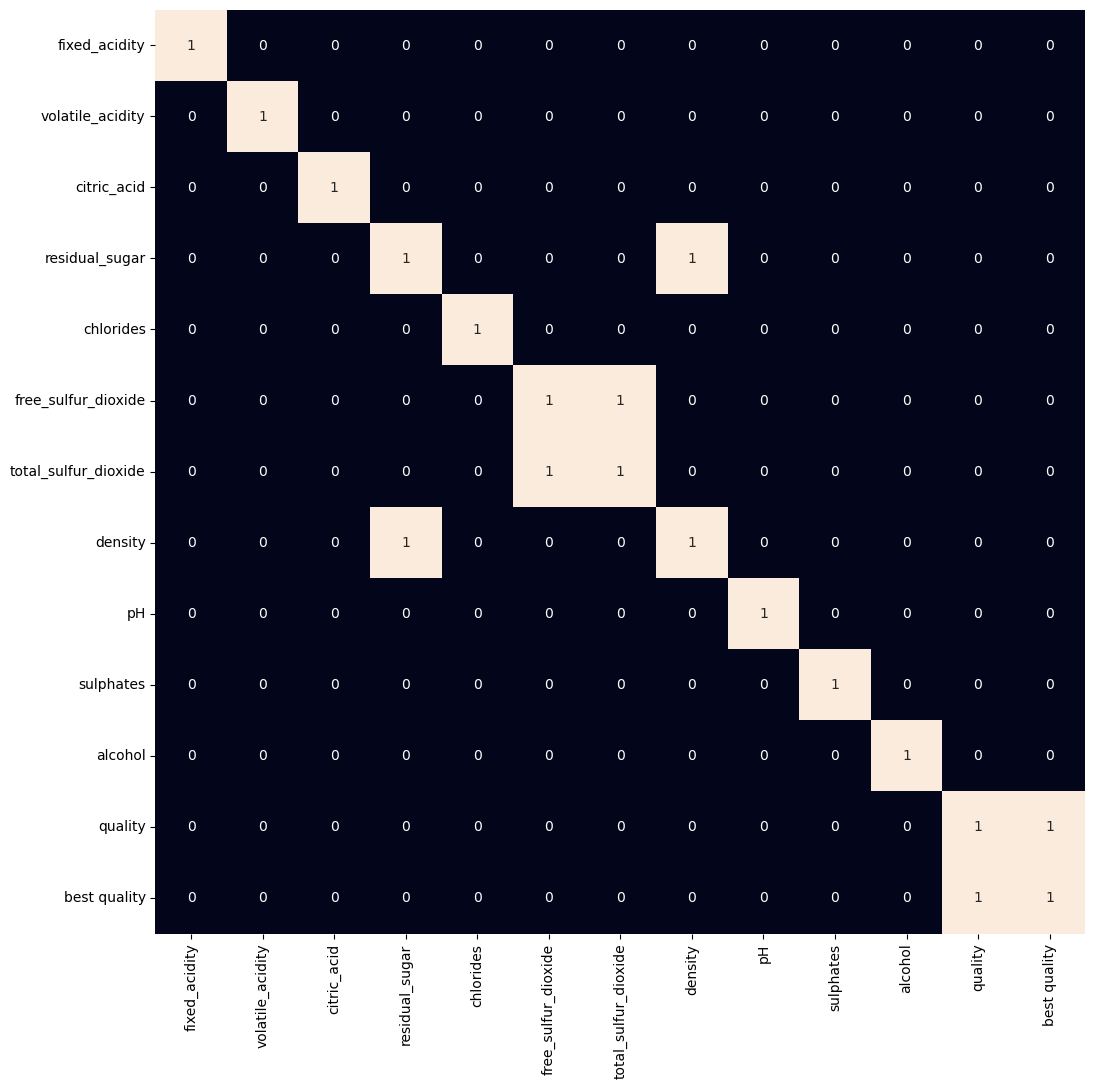

In [355]:
# Look for redundant features (corr>0.65)

#changed to 0.65 for white wine

plt.figure(figsize=(12, 12))
sb.heatmap(White_df.corr() > 0.6, annot=True, cbar=False)
plt.show()

In [303]:
# Drop columns (if necessary); redundant features

#White_df =White_df.drop('density', axis=1)
#White_df =White_df.drop('total_sulfur_dioxide', axis=1)

In [326]:
#  ***add best quality column, target best quality vs quality
# Quality data is unbalanced 
#create "best quality" >5 (3-5,6-9)....also try with >6 (3-6,7-9)

White_df['best quality'] = [1 if x>5 else 0 for x in White_df.quality]

In [327]:
#Split data into training and test/validation (80/20); tried 75/25

#From Klaus- stratify the ywhites column so we don't end up with all '8-9' in the testing data, for example


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=40)
X_train.shape, X_test.shape

((1148, 11), (287, 11))

In [328]:
# Normalize the data before training

norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

#convert X_test to df for easy viewing, confirmed data from all columns scaled form 0 to 1
X_test_df = pd.DataFrame(np.squeeze(X_train))
X_test_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.757282,0.363636,0.644737,0.394737,0.390977,0.071429,0.132075,0.817124,0.222222,0.606742,0.446429
1,0.252427,0.438017,0.000000,0.078947,0.398496,0.250000,0.094340,0.376559,0.535354,0.157303,0.285714
2,0.184466,0.574380,0.026316,0.473684,0.451128,0.285714,0.176101,0.451372,0.727273,0.629213,0.696429
3,0.310680,0.632231,0.039474,0.236842,0.345865,0.053571,0.012579,0.592685,0.505051,0.000000,0.125000
4,0.281553,0.314050,0.381579,0.368421,0.556391,0.071429,0.050314,0.411471,0.464646,0.325843,0.553571
...,...,...,...,...,...,...,...,...,...,...,...
1143,0.165049,0.214876,0.184211,0.342105,0.195489,0.250000,0.119497,0.421446,0.585859,0.359551,0.482143
1144,0.359223,0.363636,0.105263,0.315789,0.699248,0.267857,0.238994,0.476309,0.272727,0.213483,0.464286
1145,0.194175,0.413223,0.276316,0.263158,0.503759,0.125000,0.352201,0.576060,0.666667,0.280899,0.160714
1146,0.475728,0.247934,0.460526,0.315789,0.533835,0.285714,0.201258,0.511222,0.373737,0.370787,0.482143


In [329]:
#look at (3) different models

models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
 
for i in range(3):
    models[i].fit(X_train, y_train)
 
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(y_train, models[i].predict(X_train)))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        y_test, models[i].predict(X_test)))
    print()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) : 
Training Accuracy :  0.7483843467260677
Validation Accuracy :  0.7912756598240469

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              

In [330]:
# LogisticalRegression

print(metrics.classification_report(y_test,
                                    models[0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       132
           1       0.82      0.79      0.80       155

    accuracy                           0.79       287
   macro avg       0.79      0.79      0.79       287
weighted avg       0.79      0.79      0.79       287



In [331]:
# XGBClassifier (Extreme Gradient Boosting)

print(metrics.classification_report(y_test,
                                    models[1].predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       132
           1       0.83      0.80      0.81       155

    accuracy                           0.80       287
   macro avg       0.80      0.80      0.80       287
weighted avg       0.80      0.80      0.80       287



In [332]:
#SVC (Support Vector Classification)

print(metrics.classification_report(y_test,
                                    models[2].predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       132
           1       0.82      0.75      0.79       155

    accuracy                           0.78       287
   macro avg       0.78      0.78      0.78       287
weighted avg       0.78      0.78      0.78       287



In [357]:
White_df


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4686,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4687,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4688,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1
